# Prétraitement des images 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Import du dataset

In [3]:
path = "./Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
list_photos[0]

1050


'aa68675f50a0551b8dadb954017a50a1.jpg'

In [4]:
# Chargement du dataframe avec l'id du produit et sa catégorie
df = pd.read_csv('csv/text_clean.csv')
df.head(2)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...


In [5]:
df['filename'] = df.uniq_id + '.jpg'
df.head(3)

,Unnamed: 0,uniq_id,product_name_clean,description_clean,main_category,main_category_num,description_name,filename
0,0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4,key feature elegance polyester multicolor abst...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specification cotton bath towel bath towel red...,Baby Care,0,specification cotton bath towel bath towel red...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,2,64d5d4a258243731dc7bbb1eef49ad74,eurospa cotton terry face towel set,key feature cotton terry face towel set size s...,Baby Care,0,key feature cotton terry face towel set size s...,64d5d4a258243731dc7bbb1eef49ad74.jpg


Text(0.5, 1.0, 'Data Distribution')

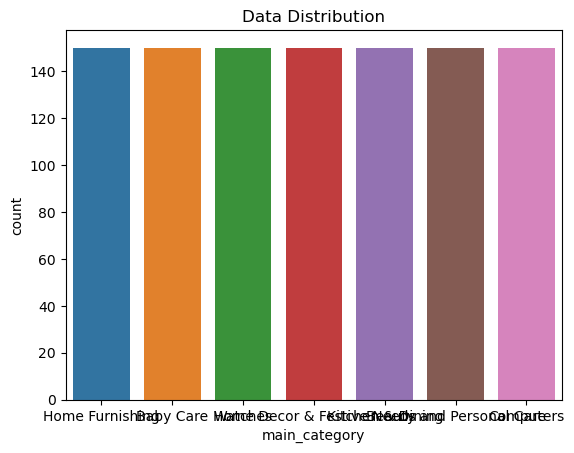

In [7]:
sns.countplot(x='main_category',data=df).set_title("Data Distribution")

In [8]:
# Chargement du modèle pré-entrainé mobile net
mobilnet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2023-04-05 14:50:17.353372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Extraction des features des images
def extract_features(filename):
    img = load_img(path+filename, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    img_array = mobilnet_model.predict(img_array)
    return img_array.flatten()

In [10]:
features = []
for filename in df['filename']:
    features.append(extract_features(filename))

1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 64ms/step


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 50ms/step


In [11]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
# Ajout des features au dataframe
df_features = pd.DataFrame(np.array(features))
df_features.columns = ['feature_' + str(i) for i in range(df_features.shape[1])]
df_with_features = pd.concat([df, df_features], axis=1)

In [14]:
df_features

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_50166,feature_50167,feature_50168,feature_50169,feature_50170,feature_50171,feature_50172,feature_50173,feature_50174,feature_50175
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.553219,0.0,0.0,...,0.0,2.164227,0.0,0.0,0.0,0.000000,3.247250,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,2.892502,3.961426,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.991555,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.978436,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,2.437959,3.954994,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.805225,0.0,0.0,...,0.0,0.789619,0.0,0.0,0.0,0.000000,3.798842,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.739321,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,2.430888,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.604751,0.0,0.0,0.0,2.084510,1.730327,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.184841,0.0,0.0,...,0.0,2.481241,0.0,0.0,0.0,0.000000,2.771658,0.0,0.0,0.0


In [15]:
# Enregistrement des données avec les features
df_with_features.to_csv('csv/data_with_features_mobile_net.csv', index=False)

In [17]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", df_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(df_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 50176)
Dimensions dataset après réduction PCA :  (1050, 977)


In [19]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:3], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["main_category_num"]
print(df_tsne.shape)

(1050, 3)


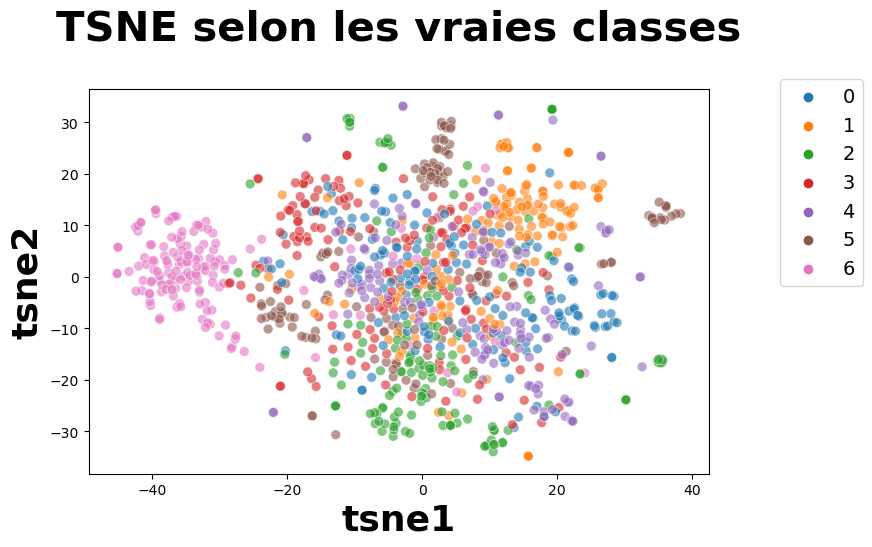

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.1, 1.05)) 

plt.show()

In [21]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


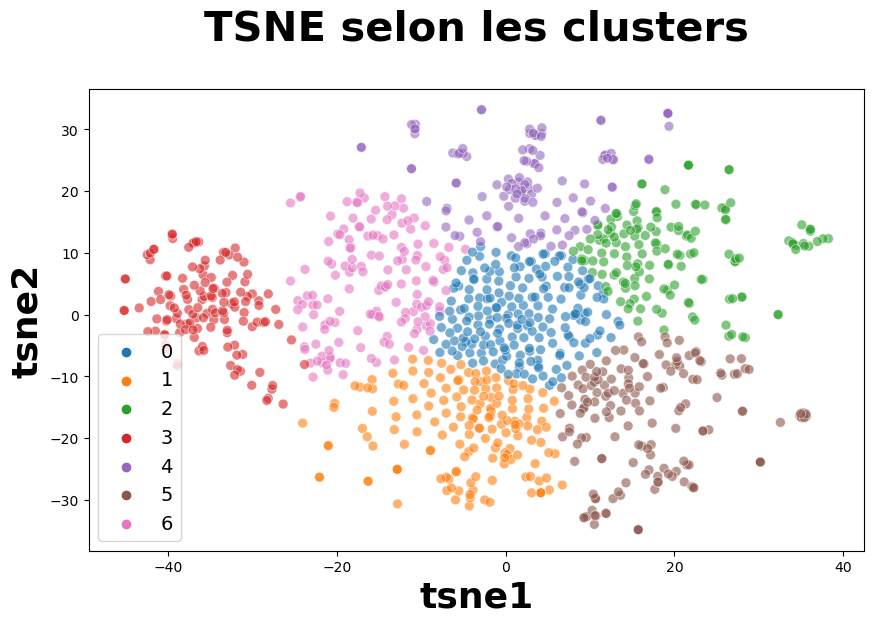

ARI :  0.2027530057082422


In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["main_category_num"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [24]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score

# Calcul du Silhouette Score
silhouette = silhouette_score(X_tsne, cls.labels_)

# Calcul de l'homogénéité, de la complétude et de la V-mesure
homogeneity = homogeneity_score(labels, cls.labels_)
completeness = completeness_score(labels, cls.labels_)
v_measure = v_measure_score(labels, cls.labels_)

# Calcul de l'indice de Fowlkes-Mallows
fm_index = fowlkes_mallows_score(labels, cls.labels_)

print(f'Silouette:{silhouette}, homogeneity:{homogeneity},completeness:{completeness},v_measure:{v_measure},fm_index:{fm_index} ')

Silouette:0.36590325832366943, homogeneity:0.26265933138597064,completeness:0.2639846994858981,v_measure:0.2633203477054586,fm_index:0.3171157923821582 


In [25]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    189
1    159
2    150
3    134
4    116
5    157
6    145
Name: class, dtype: int64

In [28]:
def classification_accuracy(df_name):
    train_data, test_data, train_labels, test_labels = train_test_split(X, df.main_category_num, test_size=0.2, random_state=42)
    classifier = SVC()
    classifier.fit(train_data,train_labels)
    predictions = classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy : {round((accuracy * 100),2)}%")

In [31]:
X = df_tsne[['tsne1', 'tsne2']]
classification_accuracy(X)

Accuracy : 50.95%
